In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from PIL import Image

import cv2

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from plyer import notification


In [2]:
def alert():
    notification.notify(
    title = "Python",
    message = "Execution Completed",
    timeout = 10
    )
    

In [3]:
test_dir = "dataset/test/"
train_dir = "dataset/train/"

classes = os.listdir(train_dir)
classes

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

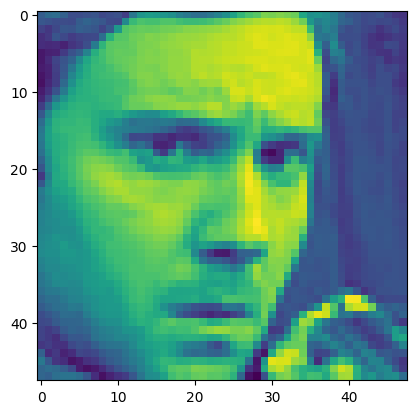

In [4]:
data = np.asarray(Image.open(r"dataset\train\angry\im0.png"))
# plt.imshow(data)
data = data.reshape(48*48)
plt.imshow(data.reshape(48,48))

In [5]:
x_train = []
y_train = []

In [6]:
encoded_classes = [i for i in range(len(classes))]

for i in range(len(classes)):
    datalist = os.listdir(train_dir+classes[i])
    for j in datalist:
        data = np.asarray(Image.open(train_dir+classes[i]+"/"+j))
        x_train.append(data.reshape(48*48))
        y_train.append(encoded_classes[i])
        

x_train = np.array(x_train)
y_train = np.array(y_train)


In [7]:
def image_show(img):
    data = img.reshape(48,48)
    plt.imshow(cv2.cvtColor(data,cv2.COLOR_BGR2RGB))
    plt.show()

In [8]:
x_train.shape

(28709, 2304)

4


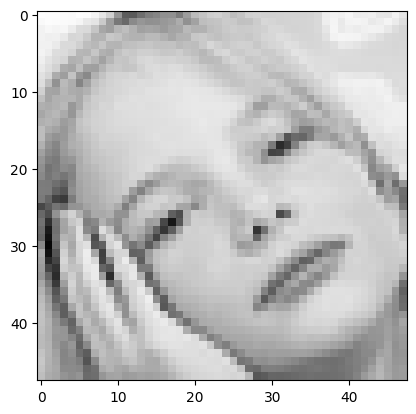

In [9]:
print(y_train[20000])
image_show(x_train[20000])

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.1,random_state=30)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25838, 2304)
(25838,)
(2871, 2304)
(2871,)


In [12]:
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)

In [13]:
# ord_encdr = OrdinalEncoder()
# y_train_encoded = ord_encdr.fit_transform(y_train.reshape(-1,1))

In [14]:
# ord_encdr.categories_

In [15]:
rnd_model = SVC()

In [16]:
rnd_model.fit(x_train_scaled[:5000],y_train[:5000])

SVC()

In [17]:
# cross_val_score(rnd_model,x_train_scaled[:5000],y_train[:5000],cv=3,scoring='accuracy')

In [18]:
alert()

In [20]:
rnd_model.predict([x_train[1000]])

array([0])